In [52]:
import cv2
import matplotlib.pyplot as plt
import time
import numpy as np

In [53]:
image = cv2.imread('uncropped/green3.jpg', cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

44 91 59
47 92 61
69 114 93
64 109 88
Detection time: 0.015816926956176758


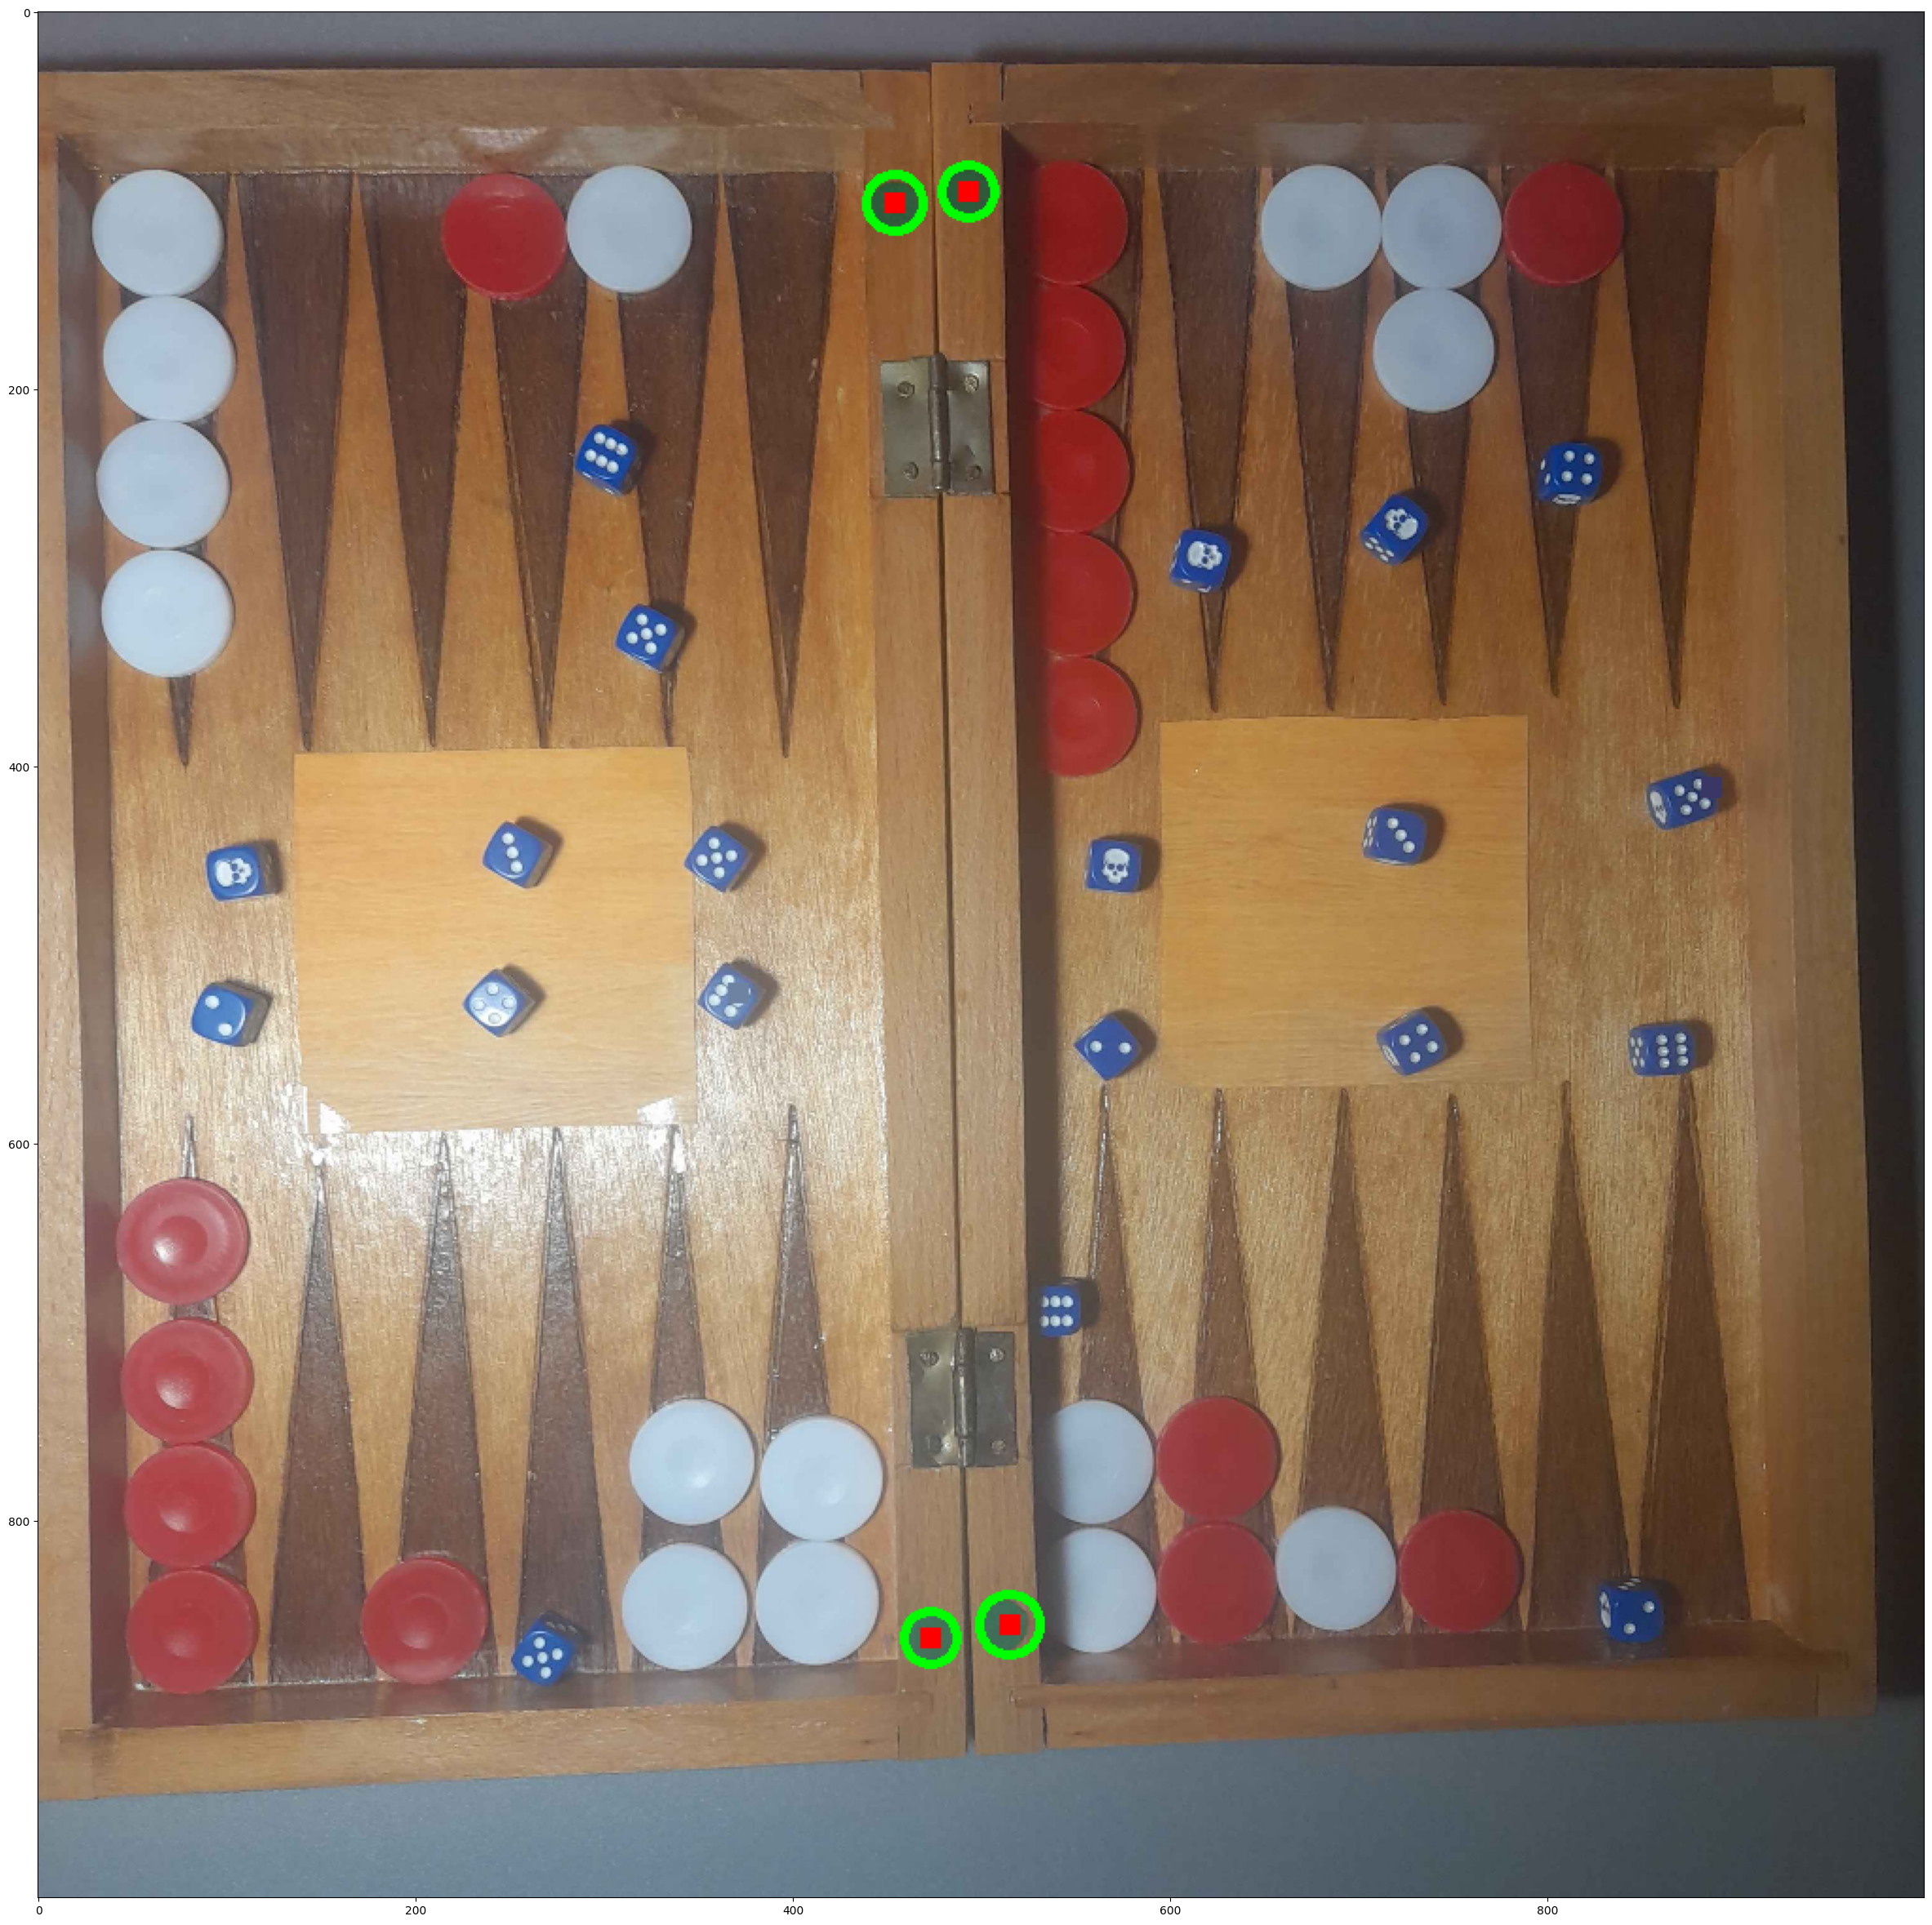

In [54]:

# Load the image
img = cv2.resize(image, (1000,1000))
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

start = time.time()

# Apply Gaussian Blur to reduce noise
# blurred = cv2.GaussianBlur(gray, (9, 9), 2)
blurred = cv2.GaussianBlur(gray, (5,5),0)
blurred = cv2.blur(blurred, (5,5))

# Detect circles using HoughCircles
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1.2, minDist=5,
                           param1=50, param2=30, minRadius=1, maxRadius=20)

bar_indicators = []

# If circles are detected, draw them on the image
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        (R, G, B) = (int(img[y,x,0]),int(img[y,x,1]),int(img[y,x,2])) #!!! x and y places switched
        # print(R,G,B)
        # print(x,y)
        cv2.rectangle(img, (x - 5, y - 5), (x + 5, y + 5), (R, G, B), -1)  # Center
        if G - max(B,R) > 10 and G > 60 and G < 210:
            # print("^green")
            print(R,G,B)
            cv2.circle(img, (x, y), r, (0, 255, 0), 4)  # Circle
            cv2.rectangle(img, (x - 5, y - 5), (x + 5, y + 5), (255, 0, 0), -1)  # Center

            bar_indicators.append((x,y))

end = time.time()
print("Detection time:", end-start)

# Display the output
plt.figure(figsize=(30,30))
plt.imshow(img)
plt.show()

[(493, 95), (454, 101), (473, 862), (515, 855)]
(0, 1) (2, 3)
[493, 454, 473, 515]
[95, 101, 862, 855]


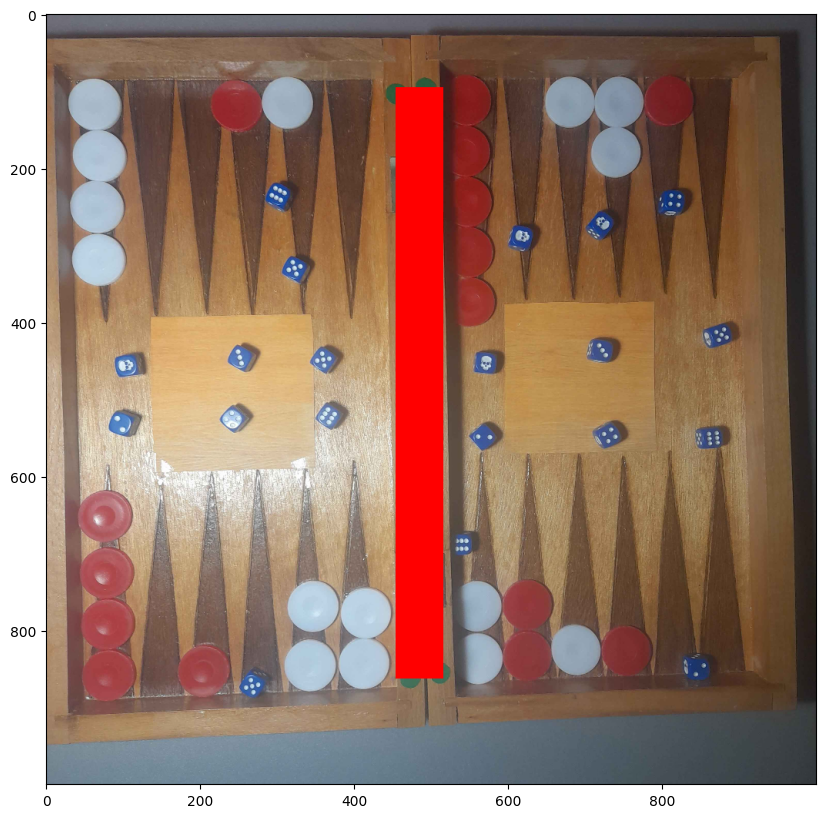

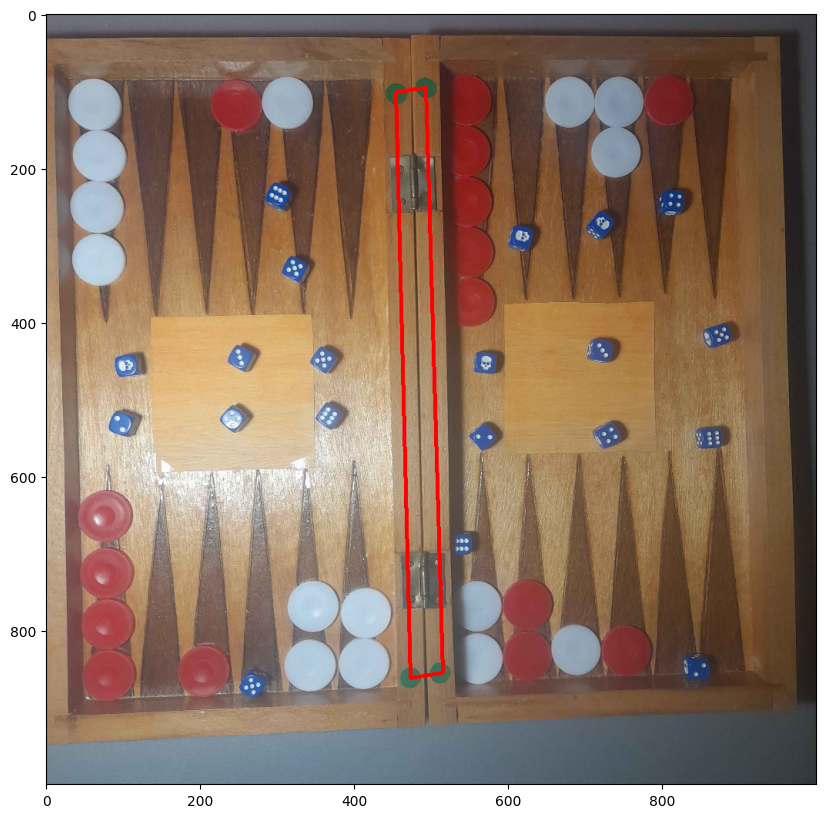

In [55]:
print(bar_indicators)

if len(bar_indicators) != 4: raise Exception("There need to be 4 indicators, not", len(bar_indicators)) #In the real code we will skip bar related activities

shortest_dist = 1000000
closest_indicator = None
for idx in [1,2,3]:
    dist = abs(bar_indicators[idx][0] - bar_indicators[0][0]) + abs(bar_indicators[idx][1] - bar_indicators[0][1]) #L1 distance
    if dist < shortest_dist:
        shortest_dist = dist
        closest_indicator = idx

pair1 = (0, closest_indicator)
pair2 = tuple([x for x in range(1,4) if x is not closest_indicator])
print(pair1, pair2)

x_positions = [x for (x,y) in bar_indicators]
y_positions = [y for (x,y) in bar_indicators]
print(x_positions)
print(y_positions)

img = cv2.resize(image, (1000,1000))
cv2.rectangle(img, (min(x_positions), min(y_positions)), (max(x_positions), max(y_positions)), (255, 0, 0), -1)
# Display the output
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()


img = cv2.resize(image, (1000,1000))
# TODO draw lines between indicators in pairs and then check if pair1[0] to pair2[0] intersects with pair1[1] to pair2[1] if not, draw those
cv2.line(img, bar_indicators[pair1[0]], bar_indicators[pair1[1]], (255,0,0), 3) 
cv2.line(img, bar_indicators[pair2[0]], bar_indicators[pair2[1]], (255,0,0), 3)

cv2.line(img, bar_indicators[pair1[0]], bar_indicators[pair2[1]], (255,0,0), 3) 
cv2.line(img, bar_indicators[pair1[1]], bar_indicators[pair2[0]], (255,0,0), 3)

# Display the output
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()


In [56]:
shortest_dist

45

[(493, 95), (454, 101), (473, 862), (515, 855)]
[(511, 77), (436, 83), (455, 880), (533, 873)]


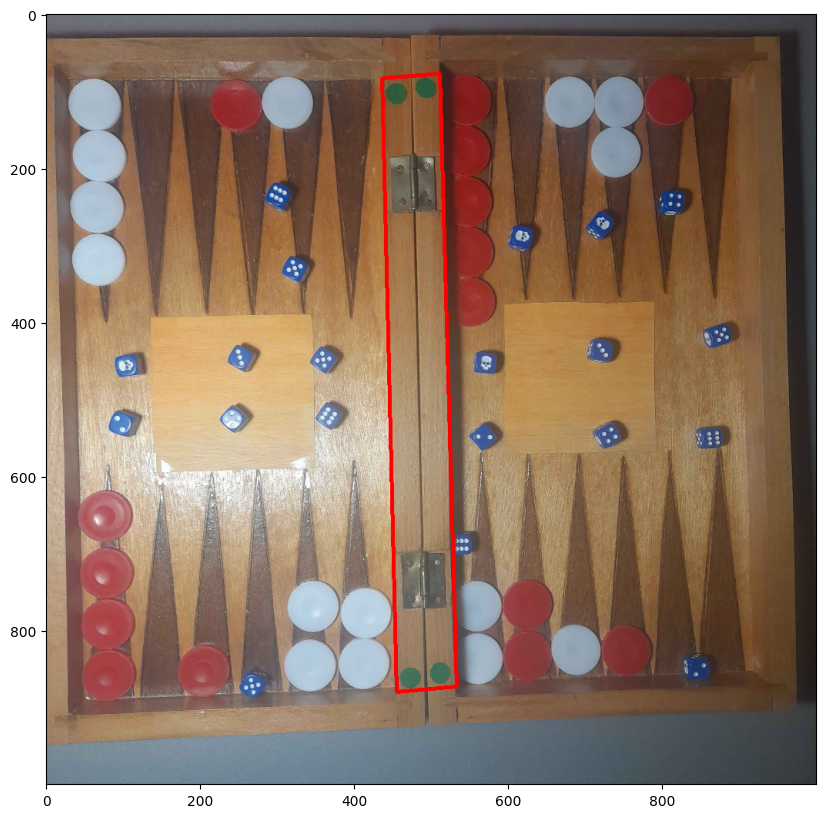

In [ ]:
print(bar_indicators)

x_centre = np.mean(x_positions)
y_centre = np.mean(y_positions)

new_bar_indicators = []
for i in range(len(bar_indicators)):
    point = bar_indicators[i]

    new_point = [0,0]
    m = 0.4

    if point[0] > x_centre:
        new_point[0] = point[0] + int(m* shortest_dist)
    else:
        new_point[0] = point[0] - int(m* shortest_dist)

    if point[1] > y_centre:
        new_point[1] = point[1] + int(m* shortest_dist)
    else:
        new_point[1] = point[1] - int(m* shortest_dist)

    new_point = tuple(new_point)

    new_bar_indicators.append(new_point)

print(new_bar_indicators)

img = cv2.resize(image, (1000,1000))
cv2.line(img, new_bar_indicators[pair1[0]], new_bar_indicators[pair1[1]], (255,0,0), 3) 
cv2.line(img, new_bar_indicators[pair2[0]], new_bar_indicators[pair2[1]], (255,0,0), 3)

cv2.line(img, new_bar_indicators[pair1[0]], new_bar_indicators[pair2[1]], (255,0,0), 3) 
cv2.line(img, new_bar_indicators[pair1[1]], new_bar_indicators[pair2[0]], (255,0,0), 3)

# Display the output
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()